In [1]:
import pandas as pd
import numpy as np

Jan = pd.read_csv('202501-divvy-tripdata.csv')
Feb = pd.read_csv('202402-divvy-tripdata.csv')
Mar = pd.read_csv('202403-divvy-tripdata.csv')
Apr = pd.read_csv('202404-divvy-tripdata.csv')
May = pd.read_csv('202405-divvy-tripdata.csv')
Jun = pd.read_csv('202406-divvy-tripdata.csv')
Jul = pd.read_csv('202407-divvy-tripdata.csv')
Aug = pd.read_csv('202408-divvy-tripdata.csv')
Sep = pd.read_csv('202409-divvy-tripdata.csv')
Oct = pd.read_csv('202410-divvy-tripdata.csv')
Nov = pd.read_csv('202411-divvy-tripdata.csv')
Dec = pd.read_csv('202412-divvy-tripdata.csv')




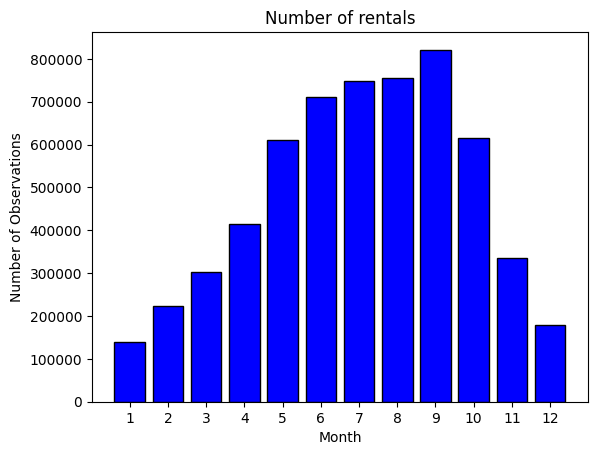

In [2]:
import matplotlib.pyplot as plt


year = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
counts = [len(data) for data in year]
plt.bar(range(1, 13), counts, color='blue', edgecolor='black')
plt.title('Number of rentals')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(1, 13))
plt.show()


In [3]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c


for month in year:
  month["started_at"] = pd.to_datetime(month["started_at"])
  month["ended_at"] = pd.to_datetime(month["ended_at"])
  month["ride_length"] = month["ended_at"] - month["started_at"]
  month["week_day"] = month["started_at"].dt.day_name()
  month["distance"] = haversine(month["start_lat"], month["start_lng"], month["end_lat"], month["end_lng"])



In [4]:
count_member = []
count_casual = []
for month in year:
  count_member.append(len(month[month["member_casual"] == "member"]))
  count_casual.append(len(month[month["member_casual"] == "casual"]))

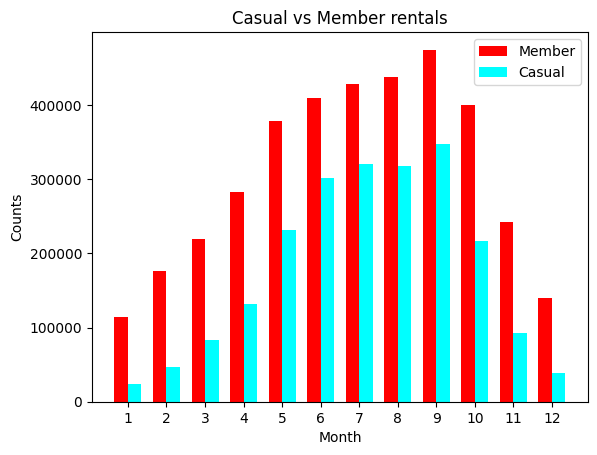

In [5]:
x = np.arange(12)  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()

# First set of bars (shift left)
ax.bar(x - width/2, count_member, width, label='Member', color = "red" )

# Second set of bars (shift right)
ax.bar(x + width/2, count_casual, width, label='Casual', color = "cyan")
ax.set_xlabel('Month')
ax.set_ylabel('Counts')
ax.set_title('Casual vs Member rentals')
ax.set_xticks(x)
ax.set_xticklabels(range(1,13))
ax.legend()


# It can be concluded easily from two graphs above that the number of rentals in summer months from May to October is significantly higher than that in other months. However looking in details, it can be seen that the number for casual riders increases and decreases more dramatically between seasonal shifts

In [6]:
mean_length_member = []
mean_length_casual = []
for month in year:
  mean_length_member.append(month[month["member_casual"] == "member"]["ride_length"].mean())
  mean_length_casual.append(month[month["member_casual"] == "casual"]["ride_length"].mean())


In [7]:
for i in range(len(mean_length_member)):
  mean_length_member[i] = mean_length_member[i].total_seconds() / 60
  mean_length_casual[i] = mean_length_casual[i].total_seconds() / 60

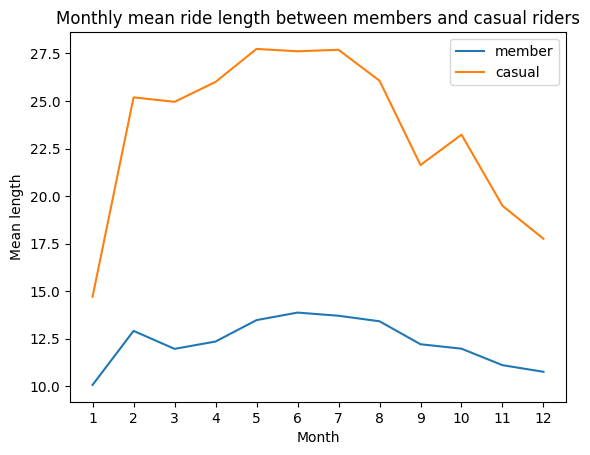

In [8]:
plt.plot(x, mean_length_member, label='member')
plt.plot(x, mean_length_casual, label='casual')
plt.title('Monthly mean ride length between members and casual riders')
plt.xlabel('Month')
plt.ylabel('Mean length')
plt.legend()
plt.xticks(ticks=range(12), labels=range(1, 13))
plt.show()

In [9]:
mean_distance_member = []
mean_distance_casual = []
for month in year:
  mean_distance_member.append(month[month["member_casual"] == "member"]["distance"].mean())
  mean_distance_casual.append(month[month["member_casual"] == "casual"]["distance"].mean())


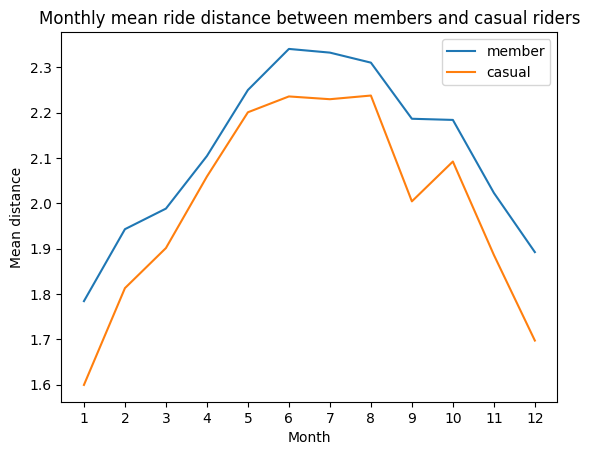

In [10]:
plt.plot(x, mean_distance_member, label='member')
plt.plot(x, mean_distance_casual, label='casual')
plt.title('Monthly mean ride distance between members and casual riders')
plt.xlabel('Month')
plt.ylabel('Mean distance')
plt.legend()
plt.xticks(ticks=range(12), labels=range(1, 13))
plt.show()

# It is observed that while the ride length (measured in means) for casual riders is significantly higher for most of the time in the year; the ride distance is slightly lower when being compared with these of members.



*This may be explained in different ways. First, casual members might mostly be tourists or visitors to the area, unfamiliar to different routes to their destinations. Members, however, might mostly be locals who use the bike sharing service as their day-to-day commute, and can use the ride much more efficient and make use of shorter routes to their destinations.*

In [11]:
Feb['week_day'].value_counts()

,count
week_day,
Thursday,43835
Tuesday,38873
Wednesday,35499
Monday,32129
Friday,29289
Sunday,24111
Saturday,19428


In [36]:
for i, df in enumerate(year, start=1):
    df['Month'] = i

year_df = pd.concat(year, ignore_index=True)


TypeError: 'tuple' object is not callable

In [37]:
year_df.shape

(5854384, 17)

In [31]:
count_df = year_df.groupby(['member_casual', 'Month', 'week_day']).size().reset_index(name='Count')
member_df = count_df[count_df["member_casual"] == "member"]
casual_df = count_df[count_df["member_casual"] == "casual"]


<ipython-input-33-063baf048856>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_df['week_day'] = pd.Categorical(member_df['week_day'], categories=weekday_order, ordered=True)
<ipython-input-33-063baf048856>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_member = member_df.pivot_table(index='week_day', columns='Month', values='Count', aggfunc='sum', fill_value=0)


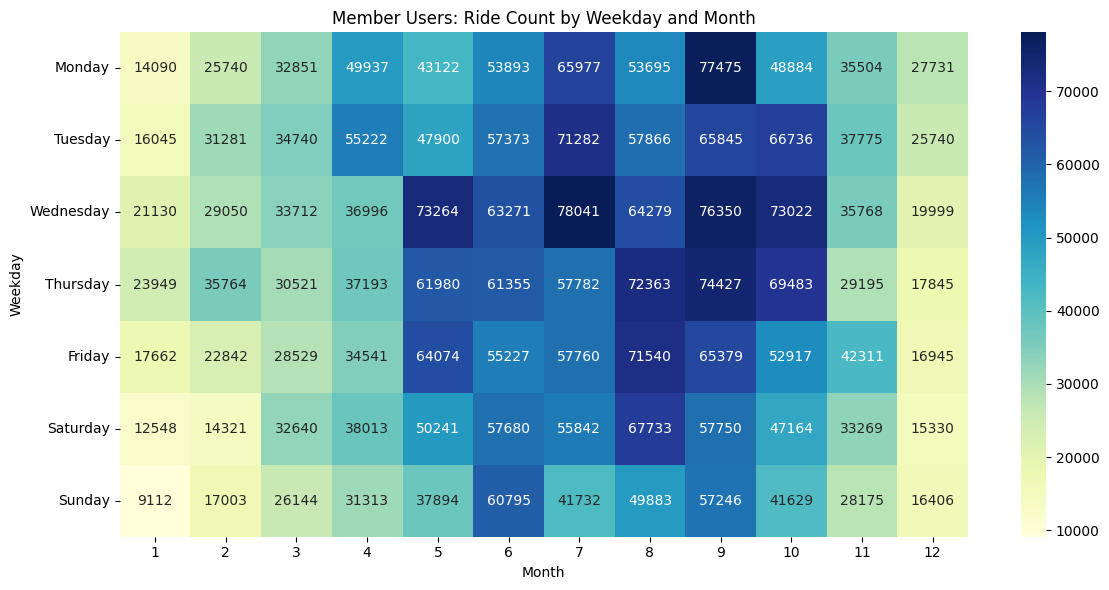

In [33]:
import seaborn as sns
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_df['week_day'] = pd.Categorical(member_df['week_day'], categories=weekday_order, ordered=True)

# Pivot the data
heatmap_data_member = member_df.pivot_table(index='week_day', columns='Month', values='Count', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_member, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Member Users: Ride Count by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

In [34]:
heatmap_data_member

Month,1,2,3,4,5,6,7,8,9,10,11,12
week_day,,,,,,,,,,,,
Monday,14090,25740,32851,49937,43122,53893,65977,53695,77475,48884,35504,27731
Tuesday,16045,31281,34740,55222,47900,57373,71282,57866,65845,66736,37775,25740
Wednesday,21130,29050,33712,36996,73264,63271,78041,64279,76350,73022,35768,19999
Thursday,23949,35764,30521,37193,61980,61355,57782,72363,74427,69483,29195,17845
Friday,17662,22842,28529,34541,64074,55227,57760,71540,65379,52917,42311,16945
Saturday,12548,14321,32640,38013,50241,57680,55842,67733,57750,47164,33269,15330
Sunday,9112,17003,26144,31313,37894,60795,41732,49883,57246,41629,28175,16406


<ipython-input-35-331fb77be3ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_df['week_day'] = pd.Categorical(casual_df['week_day'], categories=weekday_order, ordered=True)
<ipython-input-35-331fb77be3ce>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_casual = casual_df.pivot_table(index='week_day', columns='Month', values='Count', aggfunc='sum', fill_value=0)


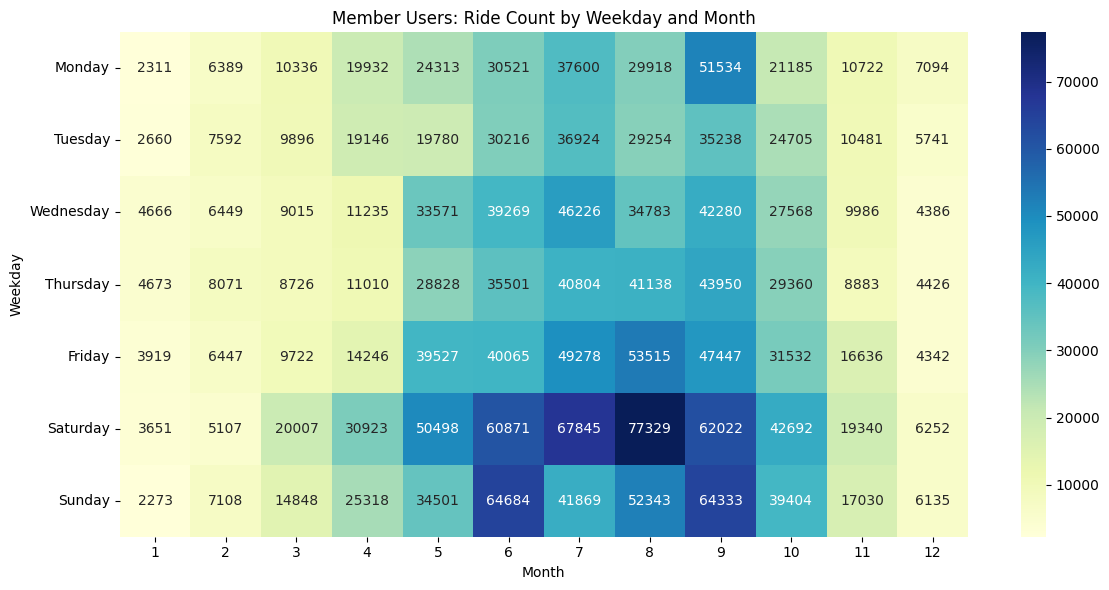

In [35]:
casual_df['week_day'] = pd.Categorical(casual_df['week_day'], categories=weekday_order, ordered=True)

# Pivot the data
heatmap_data_casual = casual_df.pivot_table(index='week_day', columns='Month', values='Count', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_casual, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Member Users: Ride Count by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

# Looking at the counts of rides in different weekdays across 12 months for both members and casual riders, the paterns can only be observable during summer months . Members tend to use the service more in weekdays instead of weekends. In contrast, casual riders rides more during weekends, specifically on Saturdays. The popularity on Sundays is not consistent across different months.

*It can be explained that members prefer to use the service for their daily commute to work or school because they likely are locals in the area. Casuals may rent bikes on weekends to explore the city as they are on vacation.*
